<a href="https://colab.research.google.com/github/FrankieBoyC/MachineLearningProject/blob/main/HomeworkTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Creating the path to the CSV file and reading it to a data frame in pandas
path = "/content/drive/MyDrive/CSV/HistoricalData.csv"

df = pd.read_csv(path, header = None)
df.columns = df.iloc[0]
df = df[1:]

In [ ]:
#Number Two
# Using Numpy to generate random rows
random_indices = np.random.randint(0, len(df), size=10)
random_rows = df.iloc[random_indices]
print(random_rows)

# Box Plot, replacing all white space and '$' signs
df['Close/Last'] = df['Close/Last'].str.replace('$', '')
df['Open'] = df['Open'].str.replace('$', '')
df['High'] = df['High'].str.replace('$', '')
df['Low'] = df['Low'].str.replace('$', '')

# Converting all values to float values
columns = df[['Close/Last', 'Open', 'High', 'Low']].astype(float)
columns.plot(kind='box', title='Stock Information')
plt.show

# Histogram Plot
# Creating bar chart
Close_Last = df['Close/Last'].iloc[:10].str.replace('$', '').astype(float)
bar_chart = Close_Last.plot(kind='bar', title ="Stock Prices", figsize=(15, 10), legend=True, fontsize=12)
bar_chart.set_xlabel("Stock Options", fontsize=12)
bar_chart.set_ylabel("Prices", fontsize=12)
plt.show()

# Summary of all data
summary = df.describe(include = 'all')
print(summary)


In [ ]:
# Number Three______________________________________________
#Finding Missing Values
df.isnull().values.any()
df.isnull().sum().sum()

# Finding and Replacing Outliers
# Turning all values into float values
df['Close/Last'] = df['Close/Last'].str.replace('$', '')
df['Close/Last'] = df['Close/Last'].astype(float)

df['Volume'] = df['Volume'].str.replace('$', '')
df['Volume'] = df['Volume'].astype(float)

df['Open'] = df['Open'].str.replace('$', '')
df['Open'] = df['Open'].astype(float)

df['High'] = df['High'].str.replace('$', '')
df['High'] = df['High'].astype(float)

df['Low'] = df['Low'].str.replace('$', '')
df['Low'] = df['Low'].astype(float)

# Finding and Replacing Outliers with quantile() function
print(df['Close/Last'].quantile(0.50))
print(df['Close/Last'].quantile(0.95))
df['Close/Last'] = np.where(df['Close/Last'] > 184, 53, df['Close/Last'])

print(df['Volume'].quantile(0.50))
print(df['Volume'].quantile(0.95))
df['Volume'] = np.where(df['Volume'] > 264496620, 106221900, df['Volume'])

print(df['Open'].quantile(0.50))
print(df['Open'].quantile(0.95))
df['Open'] = np.where(df['Open'] > 183, 53, df['Open'])

print(df['High'].quantile(0.50))
print(df['High'].quantile(0.95))
df['High'] = np.where(df['High'] > 185, 54, df['High'])

print(df['Low'].quantile(0.50))
print(df['Low'].quantile(0.95))
df['Low'] = np.where(df['Low'] > 182, 52, df['Low'])


# Create a scatter plot
# Using matplot lib to make a scatter plot
plt.scatter( df['Low'], df['High'])
plt.xlabel('Low')
plt.ylabel('High')
plt.title('Scatter Plot')
plt.show()

In [ ]:
# Number Four
# Create Correlation Matrix
df_high_low = df[['High', 'Low']]
correlation_matrix = df_high_low.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

[7.198357e+07 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 5.977301e+07 1.062219e+08 9.931044e+07
 1.062219e+08 1.062219e+08 5.977301e+07 5.977301e+07 1.062219e+08
 1.062219e+08 7.198357e+07 1.062219e+08 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 7.198357e+07 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08 5.674312e+07
 1.062219e+08 7.198357e+07 1.062219e+08 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 6.560304e+07 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 1.062219e+08 5.977301e+07 1.062219e+08
 1.062219e+08 1.062219e+08 6.560304e+07 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08
 7.198357e+07 4.934028e+07 1.062219e+08 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08
 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08 1.062219e+08
 7.198357e+07 5.977301e+07 1.062219e+08 1.062219e+08 1.062219e+08
 6.560304e

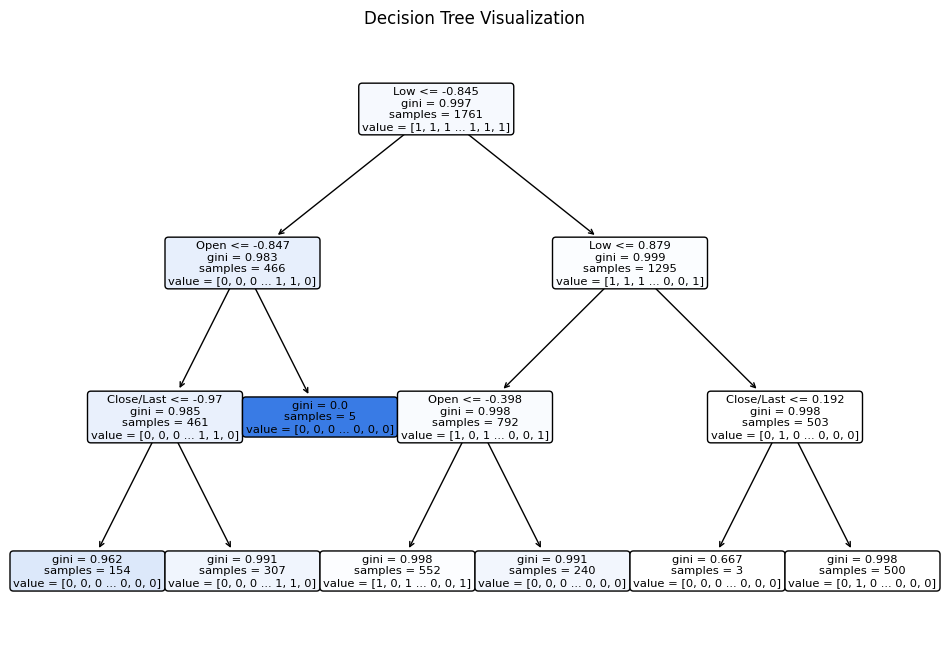

In [ ]:
# Number Five
# Splitting Data
label_encoder = LabelEncoder()
df['Date'] = label_encoder.fit_transform(df['Date'])

X = df.drop(columns=['Volume'])
y = df['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the Data
object = StandardScaler()
X_train = object.fit_transform(X_train)
X_test = object.transform(X_test)

# Logistic Regression Model
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_pred)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)
print(train_acc)
print(test_acc)

# Visualizing the tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
import pandas as pd
path = "/content/drive/MyDrive/CSV/Iris.data.csv"

df = pd.read_csv(path, header=None, names=features)

selectedData=df[["petal_length","species"]]

print(selectedData)

df.sample(10)

df.shape

X = df.iloc[:, 0:4].values
X